In [2]:
import pandas as pd
import openai
import numpy as np
import time

import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('df_template.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [4]:
price_list_all = ["1yr","2yr", "5yr", "10yr", "30yr", "s&p500", "3m", "6m", "VIX"]
price_list_rates = ["3m", "6m","2yr", "5yr", "10yr", "30yr", "1yr"]

df_agg_3m = df.copy()
df_agg_6m = df.copy()
df_agg_2yr = df.copy()
df_agg_5yr = df.copy()
df_agg_10yr = df.copy()
df_agg_30yr = df.copy()
df_agg_1yr = df.copy()

df_list = [df_agg_3m, df_agg_6m, df_agg_2yr, df_agg_5yr, df_agg_10yr, df_agg_30yr, df_agg_1yr]

for i,j in zip(price_list_rates, df_list):
    d = pd.read_csv(f"{i}.csv")
    d["Date"] = pd.to_datetime(d["Date"])
    d.set_index("Date", inplace=True)
    j[f"{i}_1d"] = d[" Open"].pct_change(-1)
    j[f"{i}_2d"] = d[" Open"].pct_change(-3)
    j[f"{i}_7d"] = d[" Open"].pct_change(-7)
    if i != "1yr":
        j.dropna(inplace=True)

/var/folders/sw/lwscf3w57bz06p9m9g2_5q1r0000gn/T/ipykernel_788/60424133.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d["Date"] = pd.to_datetime(d["Date"])
/var/folders/sw/lwscf3w57bz06p9m9g2_5q1r0000gn/T/ipykernel_788/60424133.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d["Date"] = pd.to_datetime(d["Date"])
/var/folders/sw/lwscf3w57bz06p9m9g2_5q1r0000gn/T/ipykernel_788/60424133.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d["Date"] = pd.to_datetime(d["Date"])
/var/folders/sw/lwscf3w57bz06p9m9g2_5q1r0000gn/T/ipykernel_788/60424133.py:16: UserWarning:

In [5]:
#this make the graphs for hawkish
d_1_h = []
d_2_h = []
d_7_h = []

for df, yr in zip(df_list, price_list_rates):
    day_1 = df[(df["hawk/dove"] > 0) & (df[f"{yr}_1d"] > 0)].shape[0]/df[df["hawk/dove"] > 0].shape[0]
    day_2 = df[(df["hawk/dove"] > 0) & (df[f"{yr}_2d"] > 0)].shape[0]/df[df["hawk/dove"] > 0].shape[0]
    day_7 = df[(df["hawk/dove"] > 0) & (df[f"{yr}_7d"] > 0)].shape[0]/df[df["hawk/dove"] > 0].shape[0]
    d_1_h.append(day_1)
    d_2_h.append(day_2)
    d_7_h.append(day_7)

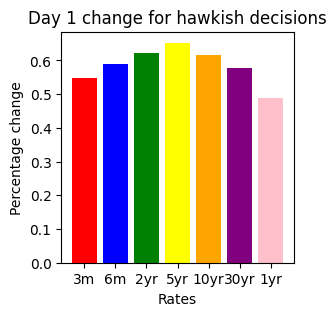

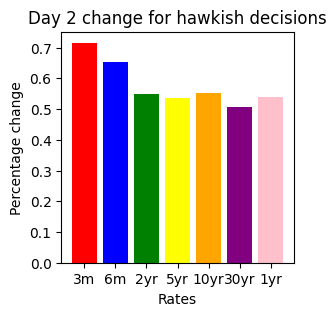

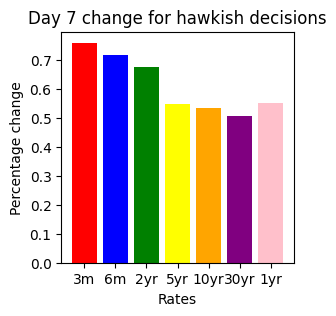

In [6]:
import matplotlib.pyplot as plt
colors = ["red", "blue", "green", "yellow", "orange", "purple", "pink"]
titles = ["Day 1 change for hawkish decisions", "Day 2 change for hawkish decisions", "Day 7 change for hawkish decisions"]
data = [d_1_h, d_2_h, d_7_h]

for i in range(3):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.bar(price_list_rates, data[i], color=colors)
    ax.set_title(titles[i])
    ax.set_xlabel("Rates")
    ax.set_ylabel("Percentage change")
    plt.show()

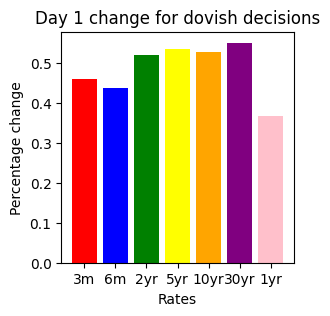

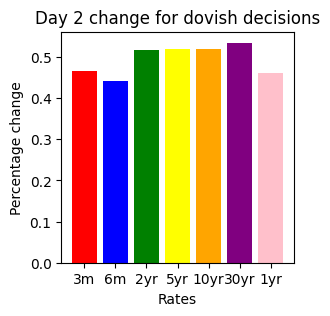

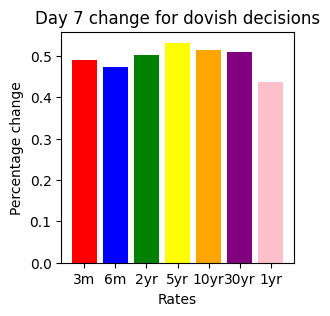

In [7]:
d_1_d = []
d_2_d = []
d_7_d = []

for df, yr in zip(df_list, price_list_rates):
    day_1 = df[(df["hawk/dove"] < 0) & (df[f"{yr}_1d"] < 0)].shape[0]/df[df["hawk/dove"] < 0].shape[0]
    day_2 = df[(df["hawk/dove"] < 0) & (df[f"{yr}_2d"] < 0)].shape[0]/df[df["hawk/dove"] < 0].shape[0]
    day_7 = df[(df["hawk/dove"] < 0) & (df[f"{yr}_7d"] < 0)].shape[0]/df[df["hawk/dove"] < 0].shape[0]
    d_1_d.append(day_1)
    d_2_d.append(day_2)
    d_7_d.append(day_7)

titles = ["Day 1 change for dovish decisions", "Day 2 change for dovish decisions", "Day 7 change for dovish decisions"]
data = [d_1_d, d_2_d, d_7_d]

for i in range(3):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.bar(price_list_rates, data[i], color=colors)
    ax.set_title(titles[i])
    ax.set_xlabel("Rates")
    ax.set_ylabel("Percentage change")
    plt.show()

In [8]:
#this prints all the results for dovish
for df, yr in zip(df_list, price_list_rates):
    day_1 = df[(df["hawk/dove"] == -1) & (df[f"{yr}_1d"] < 0)].shape[0]/df[df["hawk/dove"] == -1].shape[0]
    day_2 = df[(df["hawk/dove"] == -1) & (df[f"{yr}_2d"] < 0)].shape[0]/df[df["hawk/dove"] == -1].shape[0]
    day_7 = df[(df["hawk/dove"] == -1) & (df[f"{yr}_7d"] < 0)].shape[0]/df[df["hawk/dove"] == -1].shape[0]
    days = [day_1, day_2, day_7]
    day_count = ["1 day", "2 day", "7 day"]
    for i, j in zip(days, day_count):
        print(f"{j} change for {yr}: {i}")

1 day change for 3m: 0.6363636363636364
2 day change for 3m: 0.7272727272727273
7 day change for 3m: 0.7272727272727273
1 day change for 6m: 0.5454545454545454
2 day change for 6m: 0.7272727272727273
7 day change for 6m: 0.7272727272727273
1 day change for 2yr: 0.45454545454545453
2 day change for 2yr: 0.6363636363636364
7 day change for 2yr: 0.7272727272727273
1 day change for 5yr: 0.2727272727272727
2 day change for 5yr: 0.5454545454545454
7 day change for 5yr: 0.6363636363636364
1 day change for 10yr: 0.18181818181818182
2 day change for 10yr: 0.5454545454545454
7 day change for 10yr: 0.6363636363636364
1 day change for 30yr: 0.36363636363636365
2 day change for 30yr: 0.5454545454545454
7 day change for 30yr: 0.6363636363636364
1 day change for 1yr: 0.6363636363636364
2 day change for 1yr: 0.9090909090909091
7 day change for 1yr: 0.7272727272727273


In [9]:
#perform regression of hawk/dove on 1d change for each rate
import statsmodels.api as sm
window = 3

d_1_coef = []
d_1_r2 = []
d_1_p = []
d_1_resid = []

for df, rate in zip(df_list, price_list_rates):
    df_temp = df.copy()
    df_temp["HD"] = df_temp["hawk/dove"].rolling(window).mean()
    df_temp.dropna(inplace=True)
    X = df_temp["HD"]
    y = df_temp[f"{rate}_1d"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    d_1_coef.append(model.params[1])
    d_1_r2.append(model.rsquared)
    d_1_p.append(model.pvalues[1])
    d_1_resid.append(model.resid)

In [10]:
"""
import statsmodels.api as sm
max_r2 = 0
optimal_window = 0
for window in range(3, 300):
    d_2_coef = []
    d_2_r2 = []
    d_2_p = []
    d_2_resid = []
    for df, rate in zip(df_list, price_list_rates):
        df_temp = df.copy()
        df_temp["HD"] = df_temp["hawk/dove"].rolling(window).mean()
        df_temp.dropna(inplace=True)
        X = df_temp["HD"]
        y = df_temp[f"{rate}_2d"]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        d_2_coef.append(model.params[1])
        d_2_r2.append(model.rsquared)
        d_2_p.append(model.pvalues[1])
        d_2_resid.append(model.resid)

    avg_r2 = np.mean(d_2_r2)
    if avg_r2 > max_r2:
        max_r2 = avg_r2
        optimal_window = window
print(f"Optimal rolling window size: {optimal_window}, R2: {max_r2}")
"""


'\nimport statsmodels.api as sm\nmax_r2 = 0\noptimal_window = 0\nfor window in range(3, 300):\n    d_2_coef = []\n    d_2_r2 = []\n    d_2_p = []\n    d_2_resid = []\n    for df, rate in zip(df_list, price_list_rates):\n        df_temp = df.copy()\n        df_temp["HD"] = df_temp["hawk/dove"].rolling(window).mean()\n        df_temp.dropna(inplace=True)\n        X = df_temp["HD"]\n        y = df_temp[f"{rate}_2d"]\n        X = sm.add_constant(X)\n        model = sm.OLS(y, X).fit()\n        d_2_coef.append(model.params[1])\n        d_2_r2.append(model.rsquared)\n        d_2_p.append(model.pvalues[1])\n        d_2_resid.append(model.resid)\n\n    avg_r2 = np.mean(d_2_r2)\n    if avg_r2 > max_r2:\n        max_r2 = avg_r2\n        optimal_window = window\nprint(f"Optimal rolling window size: {optimal_window}, R2: {max_r2}")\n'

In [11]:
d_2_coef = []
d_2_r2 = []
d_2_p = []
d_2_resid = []

for df, rate in zip(df_list, price_list_rates):
    df_temp = df.copy()
    df_temp["HD"] = df_temp["hawk/dove"].rolling(window).mean()
    df_temp.dropna(inplace=True)
    X = df_temp["HD"]
    y = df_temp[f"{rate}_2d"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    d_2_coef.append(model.params[1])
    d_2_r2.append(model.rsquared)
    d_2_p.append(model.pvalues[1])
    d_2_resid.append(model.resid)

In [12]:
d_7_coef = []
d_7_r2 = []
d_7_p = []
d_7_resid = []

for df, rate in zip(df_list, price_list_rates):
    df_temp = df.copy()
    df_temp["HD"] = df_temp["hawk/dove"].rolling(window).mean()
    df_temp.dropna(inplace=True)
    X = df_temp["HD"]
    y = df_temp[f"{rate}_7d"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    d_7_coef.append(model.params[1])
    d_7_r2.append(model.rsquared)
    d_7_p.append(model.pvalues[1])
    d_7_resid.append(model.resid)

In [13]:
# create a dictionary with the data for shift1
data_d1 = {'R-squared': d_1_r2, 'HD_score coefficient': d_1_coef, 'p-value': np.round(d_1_p, 3)}
# create the dataframe for shift1
df_d1 = pd.DataFrame(data_d1, index=price_list_rates)
df_d1.to_csv('df_d1.csv')

# create a dictionary with the data for shift2
data_d2 = {'R-squared': d_2_r2, 'HD_score coefficient': d_2_coef, 'p-value': np.round(d_2_p, 3)}
# create the dataframe for shift2
df_d2 = pd.DataFrame(data_d2, index=price_list_rates)
df_d2.to_csv('df_d2.csv')

# create a dictionary with the data for shift2
data_d7 = {'R-squared': d_7_r2, 'HD_score coefficient': d_7_coef, 'p-value': np.round(d_7_p, 3)}
# create the dataframe for shift2
df_d7 = pd.DataFrame(data_d7, index=price_list_rates)
df_d7.to_csv('df_d7.csv')



In [13]:
for i in range(len(price_list_rates)):
        print(f"{price_list_rates[i]} 1d: R-squared = {d_1_r2[i]}, HD_score coefficient = {d_1_coef[i]}, p-value smaller than 0.05 = {d_1_p[i] < 0.05}")

3m 1d: R-squared = 0.0007656317654776146, HD_score coefficient = -0.0385407843184575, p-value smaller than 0.05 = False
6m 1d: R-squared = 0.0016654186052957876, HD_score coefficient = 0.0156797662352063, p-value smaller than 0.05 = False
2yr 1d: R-squared = 0.019919939117156393, HD_score coefficient = 0.030258768309708126, p-value smaller than 0.05 = True
5yr 1d: R-squared = 0.021393399444883276, HD_score coefficient = 0.02417294559817684, p-value smaller than 0.05 = True
10yr 1d: R-squared = 0.018098917877485854, HD_score coefficient = 0.016411107066034575, p-value smaller than 0.05 = True
30yr 1d: R-squared = 0.010823314738999334, HD_score coefficient = 0.009210162655341511, p-value smaller than 0.05 = True
1yr 1d: R-squared = 9.290498222269683e-05, HD_score coefficient = 0.00262632131756529, p-value smaller than 0.05 = False


In [14]:
for i in range(len(price_list_rates)):
        print(f"{price_list_rates[i]} 2d: R-squared = {d_2_r2[i]}, HD_score coefficient = {d_2_coef[i]}, p-value smaller than 0.05 = {d_2_p[i] < 0.05}")

3m 2d: R-squared = 0.0003495397928984234, HD_score coefficient = 0.023612821103511664, p-value smaller than 0.05 = False
6m 2d: R-squared = 0.00037637580694893646, HD_score coefficient = -0.043171427536788494, p-value smaller than 0.05 = False
2yr 2d: R-squared = 0.006143604390471236, HD_score coefficient = 0.026881767921191596, p-value smaller than 0.05 = True
5yr 2d: R-squared = 0.0018323451210993102, HD_score coefficient = 0.012029602649309457, p-value smaller than 0.05 = False
10yr 2d: R-squared = 0.0007828374039391406, HD_score coefficient = 0.005432998501821476, p-value smaller than 0.05 = False
30yr 2d: R-squared = 0.001084530523058791, HD_score coefficient = 0.004526738765212714, p-value smaller than 0.05 = False
1yr 2d: R-squared = 0.009444281963969292, HD_score coefficient = 0.041252969659313736, p-value smaller than 0.05 = True


In [15]:
for i in range(len(price_list_rates)):
        print(f"{price_list_rates[i]} 7d: R-squared = {d_7_r2[i]}, HD_score coefficient = {d_7_coef[i]}, p-value smaller than 0.05 = {d_7_p[i] < 0.05}")

3m 7d: R-squared = 0.0012462262349317577, HD_score coefficient = 0.10079473629244562, p-value smaller than 0.05 = False
6m 7d: R-squared = 0.0010424014357479638, HD_score coefficient = 0.06207218400436667, p-value smaller than 0.05 = False
2yr 7d: R-squared = 0.008895324572176455, HD_score coefficient = 0.047905538554142216, p-value smaller than 0.05 = True
5yr 7d: R-squared = 0.005349707202213283, HD_score coefficient = 0.030887744422319636, p-value smaller than 0.05 = False
10yr 7d: R-squared = 0.0045919079990075495, HD_score coefficient = 0.01981951136296805, p-value smaller than 0.05 = False
30yr 7d: R-squared = 0.0068991819396928555, HD_score coefficient = 0.01688010951351284, p-value smaller than 0.05 = True
1yr 7d: R-squared = 0.025481135993102977, HD_score coefficient = 0.09537353787692411, p-value smaller than 0.05 = True


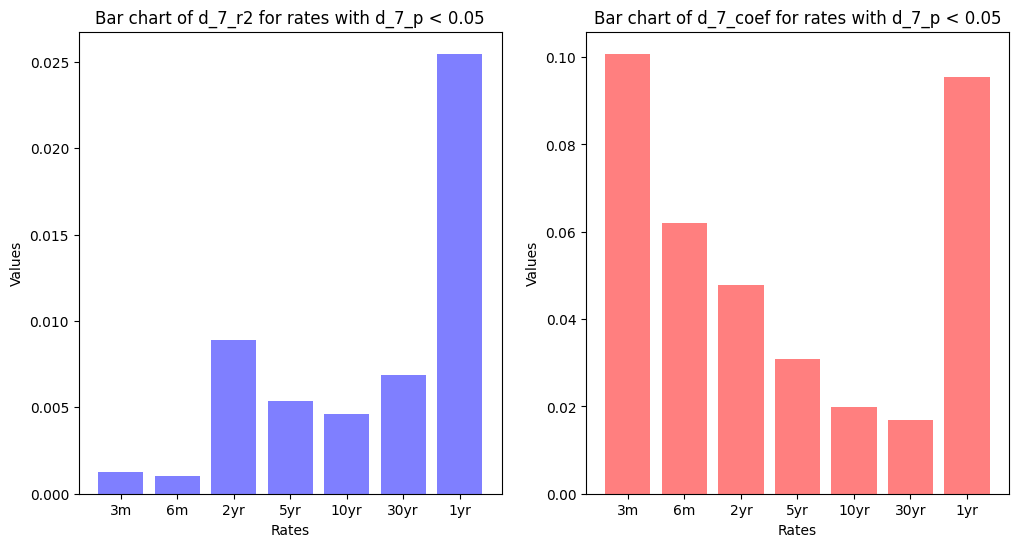

In [16]:
import matplotlib.pyplot as plt

# filter the data based on d_7_p < 0.05
#filtered_data = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_7_r2, d_7_coef, d_7_p) if p < 0.05]
filtered_data = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_7_r2, d_7_coef, d_7_p)]

# unpack the filtered data
rates, r2_values, coef_values = zip(*filtered_data)

# plot the bar chart
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axs[0].bar(rates, r2_values, color='blue', alpha=0.5, label='R-squared')
axs[0].set_title('Bar chart of d_7_r2 for rates with d_7_p < 0.05')
axs[0].set_xlabel('Rates')
axs[0].set_ylabel('Values')
axs[1].bar(rates, coef_values, color='red', alpha=0.5, label='HD_score coefficient')
axs[1].set_title('Bar chart of d_7_coef for rates with d_7_p < 0.05')
axs[1].set_xlabel('Rates')
axs[1].set_ylabel('Values')
plt.show()

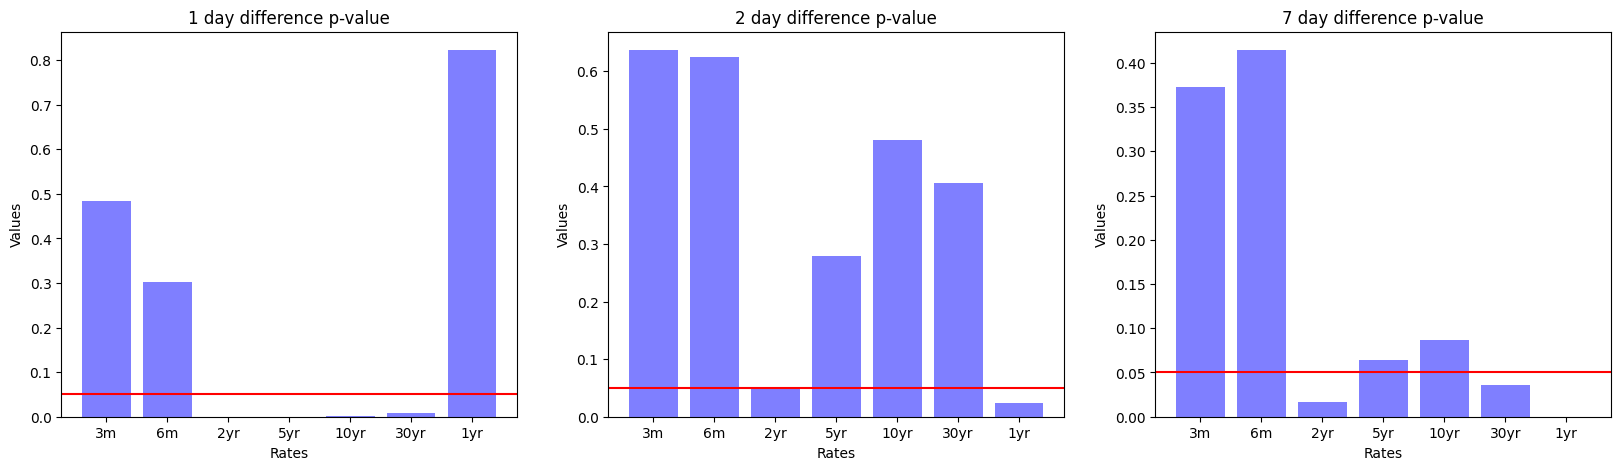

In [17]:
import matplotlib.pyplot as plt

# filter the data based on d_1_p, d_2_p, d_7_p < 0.05
#filtered_data_r2_1d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_1_r2, d_1_coef, d_1_p) if p < 0.05]
#filtered_data_r2_2d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_2_r2, d_2_coef, d_2_p) if p < 0.05]
#filtered_data_r2_7d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_7_r2, d_7_coef, d_7_p) if p < 0.05]

filtered_data_p_1d = [(rate, r2, coef, p) for rate, r2, coef, p in zip(price_list_rates, d_1_r2, d_1_coef, d_1_p)]
filtered_data_p_2d = [(rate, r2, coef, p) for rate, r2, coef, p in zip(price_list_rates, d_2_r2, d_2_coef, d_2_p)]
filtered_data_p_7d = [(rate, r2, coef, p) for rate, r2, coef, p in zip(price_list_rates, d_7_r2, d_7_coef, d_7_p)]

# plot the bar charts
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].bar([data[0] for data in filtered_data_p_1d], [data[3] for data in filtered_data_p_1d], color='blue', alpha=0.5, label='p-value')
axs[0].set_title('1 day difference p-value')
axs[0].set_xlabel('Rates')
axs[0].set_ylabel('Values')
axs[0].axhline(y=0.05, color='r', linestyle='-')
axs[1].bar([data[0] for data in filtered_data_p_2d], [data[3] for data in filtered_data_p_2d], color='blue', alpha=0.5, label='p-value')
axs[1].set_title('2 day difference p-value')
axs[1].set_xlabel('Rates')
axs[1].set_ylabel('Values')
axs[1].axhline(y=0.05, color='r', linestyle='-')
axs[2].bar([data[0] for data in filtered_data_p_7d], [data[3] for data in filtered_data_p_7d], color='blue', alpha=0.5, label='p-value')
axs[2].set_title('7 day difference p-value')
axs[2].set_xlabel('Rates')
axs[2].set_ylabel('Values')
axs[2].axhline(y=0.05, color='r', linestyle='-')
plt.show()

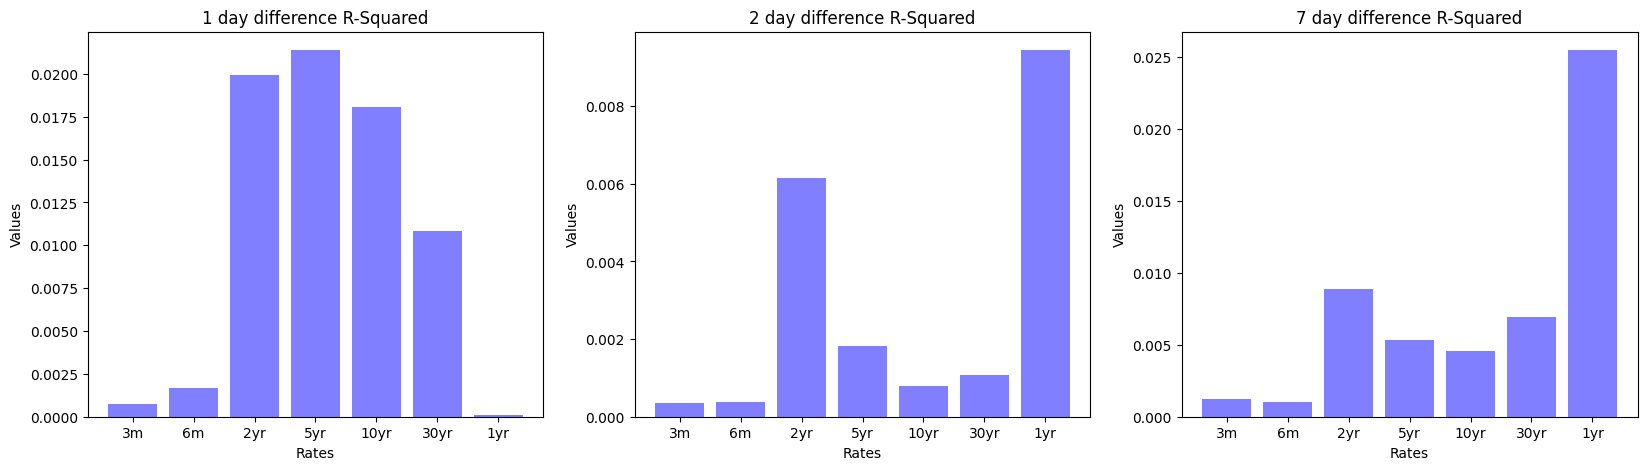

In [18]:
import matplotlib.pyplot as plt

# filter the data based on d_1_p, d_2_p, d_7_p < 0.05
filtered_data_r2_1d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_1_r2, d_1_coef, d_1_p)]
filtered_data_r2_2d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_2_r2, d_2_coef, d_2_p)]
filtered_data_r2_7d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_7_r2, d_7_coef, d_7_p)]

# plot the bar charts
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].bar([data[0] for data in filtered_data_r2_1d], [data[1] for data in filtered_data_r2_1d], color='blue', alpha=0.5, label='R-squared')
axs[0].set_title('1 day difference R-Squared')
axs[0].set_xlabel('Rates')
axs[0].set_ylabel('Values')
axs[1].bar([data[0] for data in filtered_data_r2_2d], [data[1] for data in filtered_data_r2_2d], color='blue', alpha=0.5, label='R-squared')
axs[1].set_title('2 day difference R-Squared')
axs[1].set_xlabel('Rates')
axs[1].set_ylabel('Values')
axs[2].bar([data[0] for data in filtered_data_r2_7d], [data[1] for data in filtered_data_r2_7d], color='blue', alpha=0.5, label='R-squared')
axs[2].set_title('7 day difference R-Squared')
axs[2].set_xlabel('Rates')
axs[2].set_ylabel('Values')
plt.show()

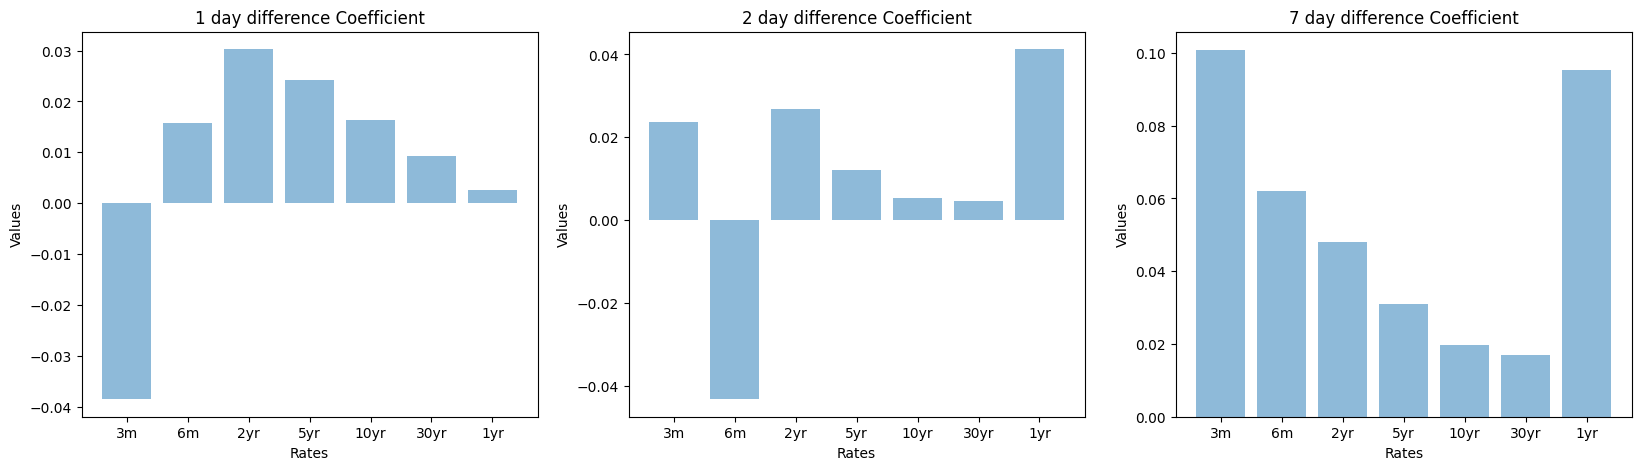

In [21]:
# filter the data based on d_1_p, d_2_p, d_7_p < 0.05
filtered_data_coef_1d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_1_r2, d_1_coef, d_1_p)]
filtered_data_coef_2d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_2_r2, d_2_coef, d_2_p)]
filtered_data_coef_7d = [(rate, r2, coef) for rate, r2, coef, p in zip(price_list_rates, d_7_r2, d_7_coef, d_7_p)]

# plot the bar charts
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].bar([data[0] for data in filtered_data_r2_1d], [data[2] for data in filtered_data_r2_1d], alpha=0.5, label='R-squared')
axs[0].set_title('1 day difference Coefficient')
axs[0].set_xlabel('Rates')
axs[0].set_ylabel('Values')
axs[1].bar([data[0] for data in filtered_data_r2_2d], [data[2] for data in filtered_data_r2_2d], alpha=0.5, label='R-squared')
axs[1].set_title('2 day difference Coefficient')
axs[1].set_xlabel('Rates')
axs[1].set_ylabel('Values')
axs[2].bar([data[0] for data in filtered_data_r2_7d], [data[2] for data in filtered_data_r2_7d],  alpha=0.5, label='R-squared')
axs[2].set_title('7 day difference Coefficient')
axs[2].set_xlabel('Rates')
axs[2].set_ylabel('Values')
plt.show()

/var/folders/sw/lwscf3w57bz06p9m9g2_5q1r0000gn/T/ipykernel_812/3599736871.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  d["Date"] = pd.to_datetime(d["Date"])
/var/folders/sw/lwscf3w57bz06p9m9g2_5q1r0000gn/T/ipykernel_812/3599736871.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"] = pd.to_datetime(data["Date"])


NameError: name 'mdates' is not defined

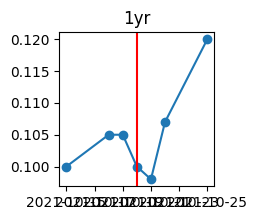

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

row = df_agg_3m[(df_agg_3m['hawk/dove'] == 0) & (df_agg_3m.index.year == 2021)].iloc[-2].name

# Example data
d = pd.read_csv("1yr.csv")
d["Date"] = pd.to_datetime(d["Date"])
d.set_index("Date", inplace=True)


# Plot the data for each rate
for rate in price_list_all:
    # Set up the figure
    fig, ax = plt.subplots(figsize=(2, 2))

    # Plot the data
    data = pd.read_csv(f"{rate}.csv")
    data["Date"] = pd.to_datetime(data["Date"])
    data.set_index("Date", inplace=True)
    start_date = pd.to_datetime(row) - pd.Timedelta(days=5)
    end_date = pd.to_datetime(row) + pd.Timedelta(days=5)
    data = data[" Open"][(data.index >= start_date) & (data.index <= end_date)]
    ax.plot(data, label=rate, marker='o')
    ax.axvline(x=row, color='r')
    ax.set_title(rate)

    # Set the x-axis to show all the days
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.tick_params(axis='x', rotation=90)

    # Show the plot
    ax.grid(True)
    plt.show()
